In [1]:
import pandas as  pd

In [2]:
ds = pd.read_csv("IRIS.csv")

In [3]:
ds

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
ds.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
ds.head(), ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(   sepal_length  sepal_width  petal_length  petal_width      species
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           4.6          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa,
 None)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
X = ds.drop(columns=["species"])
y = ds["species"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf_classifier.predict(X_test)

In [30]:
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [32]:
classification_rep, confusion_mat

('                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       0.82      0.90      0.86        10\n Iris-virginica       0.89      0.80      0.84        10\n\n       accuracy                           0.90        30\n      macro avg       0.90      0.90      0.90        30\n   weighted avg       0.90      0.90      0.90        30\n',
 array([[10,  0,  0],
        [ 0,  9,  1],
        [ 0,  2,  8]], dtype=int64))

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

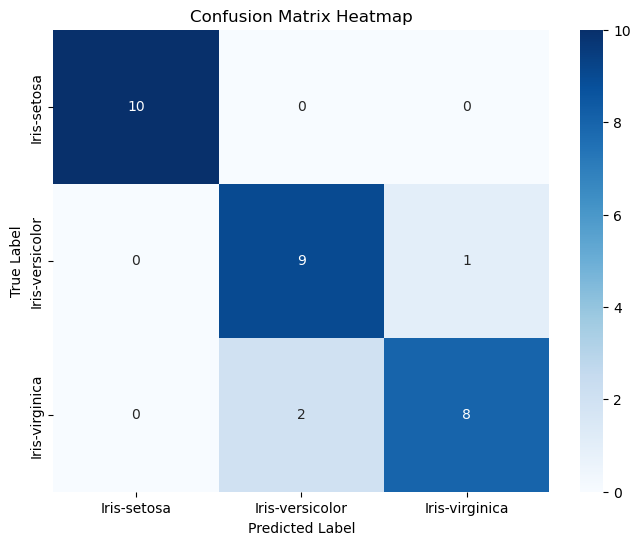

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d",
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()